# OSEMN Model (2): Scrub

# Consolidating the Data

Consolidate kaggle data and additional data that were gathered from APIs and webscraping.

In [44]:
kg_df.tail(20)

,headline,clickbait
31980,St. Michael and Rice Win Class AA Titles,0
31981,"Sarkozy says burqa is ""not welcome"" in France",0
31982,Congressional Hispanic Caucus blocks vote to i...,0
31983,US Secret Service discovers third uninvited gu...,0
31984,Three new dinosaurs discovered in Australia,0
31985,Corruption blamed for Papuan rainforest destru...,0
31986,Scotland's Dario Franchitti wins Indianapolis 500,0
31987,Scientists recreating the 1918 flu virus say '...,0
31988,Aide to Stanford May Shift Plea to Guilty,0
31989,British military secrets leaked on social netw...,0


In [87]:
kg_df.iloc[23359]['headline']

'Fed Calls Gain in Household Wealth a Mirage'

In [2]:
import pandas as pd

In [3]:
# kaggle data
kg_df = pd.read_csv('Data/clickbait_data.csv')

# additional data from APIs and webscraping
ch_df1 = pd.read_csv('Data/clickhole_lifestyle.csv')
ch_df2 = pd.read_csv('Data/clickhole_news.csv')
wt_df = pd.read_csv('Data/worldtruth_headlines.csv')
nyt_df1 = pd.read_csv('Data/nyt_jan_2021.csv')
nyt_df2 = pd.read_csv('Data/nyt_jul_2020.csv')
gu_df = pd.read_csv('Data/guardian_oct_2020.csv')

ch_df = pd.concat([ch_df1, ch_df2])
nyt_df = pd.concat([nyt_df1, nyt_df2])

In [4]:
# consolidate additional data
def consolidate_data(DataFrame_list, is_clickbait):
    for i in range(len(is_clickbait)):
        DataFrame_list[i].rename(columns={'0': 'headline', 'Unnamed: 0': "clickbait"}, inplace=True)
        DataFrame_list[i]['clickbait'] = is_clickbait[i]
    return DataFrame_list

In [5]:
data_list = consolidate_data([ch_df, wt_df, nyt_df, gu_df], [1, 1, 0, 0])

# combine additional data with kaggle data
data_list.append(kg_df)
data = pd.concat(data_list, sort=True)

In [6]:
# check class imbalance
data['clickbait'].value_counts(normalize=True)

1    0.500344
0    0.499656
Name: clickbait, dtype: float64

# Pre-processing Text

Pre-processing using Natural Language Processing:
- Check for null values
- Tokenize
- Check for encoding or special words
- Flatten into a single list of words
- Remove stopwords
- Separate numeric characters and non-numeric characters
- Lemmatize non-numeric list of words

In [361]:
# check null value and remove
data.isna().sum()

clickbait    0
headline     1
dtype: int64

In [7]:
null_index = data[pd.isnull(data['headline'])].index
data.drop(index=null_index, inplace=True)

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taejoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/taejoon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/taejoon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [11]:
tokenized_data = data

In [12]:
tokenized_data['headline'] = data.apply(lambda x: x['headline'].lower(), axis=1)

In [390]:
tokenized_data

,clickbait,headline
0,1,"5 magical cyber gems that, when printed out an..."
1,1,with great art comes great sacrifice: 5 times ...
2,1,the fact that these animals have killed people...
3,1,"come and git it, boys! 6 hunky ranch hands who..."
4,1,prioritizing self-care: this woman is enjoying...
...,...,...
65361,0,"to make female hearts flutter in iraq, throw a..."
65362,0,"british liberal democrat patsy calton, 56, die..."
65363,0,drone smartphone app to help heart attack vict...
65364,0,"netanyahu urges pope benedict, in israel, to d..."


In [13]:
tokenized_data['tokenized'] = tokenized_data.apply(lambda row: tokenizer.tokenize(row['headline']), axis=1)

In [392]:
tokenized_data

,clickbait,headline,tokenized
0,1,"5 magical cyber gems that, when printed out an...","[5, magical, cyber, gems, that, when, printed,..."
1,1,with great art comes great sacrifice: 5 times ...,"[with, great, art, comes, great, sacrifice, 5,..."
2,1,the fact that these animals have killed people...,"[the, fact, that, these, animals, have, killed..."
3,1,"come and git it, boys! 6 hunky ranch hands who...","[come, and, git, it, boys, 6, hunky, ranch, ha..."
4,1,prioritizing self-care: this woman is enjoying...,"[prioritizing, self, care, this, woman, is, en..."
...,...,...,...
65361,0,"to make female hearts flutter in iraq, throw a...","[to, make, female, hearts, flutter, in, iraq, ..."
65362,0,"british liberal democrat patsy calton, 56, die...","[british, liberal, democrat, patsy, calton, 56..."
65363,0,drone smartphone app to help heart attack vict...,"[drone, smartphone, app, to, help, heart, atta..."
65364,0,"netanyahu urges pope benedict, in israel, to d...","[netanyahu, urges, pope, benedict, in, israel,..."


In [437]:
special_character = []
for i in tokenized_data['tokenized']:
    for j in i:
        if j.isalpha():
            pass
        else:
            try:
                int(j)
            except:
                special_character.append(j)
specialset = set(special_character)

# confirmed that there are no strange words (i.e. encoding)

#isalphanum? isalnum

In [587]:
specialset

{'000km',
 '000th',
 '00s',
 '050th',
 '08m',
 '08tn',
 '10000blackinterns',
 '10000th',
 '1000blackgirls',
 '100ft',
 '100k',
 '100m',
 '100mph',
 '100th',
 '100x',
 '101st',
 '103m',
 '105m',
 '109th',
 '10am',
 '10km',
 '10m',
 '10s',
 '10th',
 '10x',
 '110k',
 '118th',
 '11am',
 '11k',
 '11n',
 '11th',
 '128k',
 '12bn',
 '12ft',
 '12lb',
 '12m',
 '12s',
 '12th',
 '130km',
 '135k',
 '13k',
 '13m',
 '13th',
 '14th',
 '150k',
 '150m',
 '15bn',
 '15m',
 '15s',
 '15th',
 '163bn',
 '16bn',
 '16m',
 '16th',
 '173m',
 '175m',
 '17c',
 '17kg',
 '17m',
 '17th',
 '1800s',
 '182nd',
 '1890s',
 '18th',
 '1900s',
 '1920s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1987a',
 '1990s',
 '19th',
 '1b',
 '1bn',
 '1in5muslims',
 '1m',
 '1mdb',
 '1million',
 '1st',
 '1up',
 '1x',
 '2000s',
 '200k',
 '200m',
 '200th',
 '20k',
 '20km',
 '20m',
 '20s',
 '20th',
 '20x',
 '21s',
 '21st',
 '22nd',
 '22s',
 '23andme',
 '23m',
 '23rd',
 '242b',
 '24m',
 '24th',
 '250m',
 '250x',
 '252m',
 '2

In [351]:
# tokenized_data = tokenized_data.apply(lambda x: tokenizer.tokenize(x['headline']))

# tokenized_data = data
# for i in range(len(data)):
#     tokenized_data['headline'][i] = tokenizer.tokenize(data['headline'][i])

KeyError: ('headline', 'occurred at index clickbait')

In [134]:
firstwords = [tokenized_data['headline'][i][0] for i in range(len(tokenized_data))]
firstwords

['should',
 'which',
 'the',
 'this',
 'a',
 'how',
 '32',
 'if',
 'what',
 'natalie',
 '16',
 '21',
 '17',
 'does',
 'who',
 '17',
 'are',
 'the',
 'here',
 '15',
 'what',
 'zoo',
 'tell',
 '9',
 '21',
 'this',
 '8',
 'another',
 '16',
 'this',
 'when',
 'an',
 'sarah',
 'which',
 'a',
 '29',
 '13',
 'we',
 '23',
 'we',
 'grimes',
 'this',
 'the',
 '17',
 'how',
 'we',
 'guys',
 '22',
 'the',
 'this',
 'here',
 'ed',
 'what',
 'take',
 'are',
 '18',
 '27',
 'how',
 'which',
 '25',
 'literally',
 '58',
 '17',
 'do',
 'which',
 '29',
 'this',
 'request',
 'issa',
 'how',
 'you',
 'no',
 'this',
 '18',
 'we',
 'charli',
 'if',
 '13',
 'will',
 '28',
 '19',
 'here',
 'this',
 'i',
 '24',
 'country',
 '17',
 'the',
 'this',
 '42',
 'this',
 '22',
 'are',
 'which',
 'how',
 'how',
 '12',
 'what',
 '23',
 'there',
 'we',
 '17',
 'here',
 'can',
 '21',
 'which',
 'anna',
 'people',
 'are',
 'do',
 'we',
 '21',
 'a',
 'be',
 'we',
 '18',
 '19',
 '20',
 '21',
 'will',
 'mark',
 'nobody',
 'are'

In [135]:
# Find frequency of each word in a string in Python 
# using dictionary. 
   
def count(elements): 
    # check if each word has '.' at its last. If so then ignore '.' 
    if elements[-1] == '.': 
        elements = elements[0:len(elements) - 1] 
   
    # if there exists a key as "elements" then simply 
    # increase its value. 
    if elements in dictionary: 
        dictionary[elements] += 1
   
    # if the dictionary does not have the key as "elements"  
    # then create a key "elements" and assign its value to 1. 
    else: 
        dictionary.update({elements: 1}) 
   
   
# driver input to check the program. 
   
Sentence = "Apple Mango Orange Mango Guava Guava Mango"
   
# Declare a dictionary 
dictionary = {} 
   
# split all the word of the string. 
lst = Sentence.split() 
   
# take each word from lst and pass it to the method count. 
for elements in lst: 
    count(elements) 
    
# print the keys and its corresponding values. 
for allKeys in dictionary: 
    print ("Frequency of ", allKeys, end = " ") 
    print (":", end = " ") 
    print (dictionary[allKeys], end = " ") 
    print()

Frequency of  Apple : 1 
Frequency of  Mango : 3 
Frequency of  Orange : 1 
Frequency of  Guava : 2 


In [139]:
dictionary = {}
for words in firstwords:
    count(words)
dictionary

{'should': 40,
 'which': 754,
 'the': 748,
 'this': 1075,
 'a': 456,
 'how': 571,
 '32': 47,
 'if': 138,
 'what': 671,
 'natalie': 6,
 '16': 244,
 '21': 622,
 '17': 649,
 'does': 10,
 'who': 98,
 'are': 264,
 'here': 456,
 '15': 333,
 'zoo': 2,
 'tell': 55,
 '9': 105,
 '8': 60,
 'another': 19,
 'when': 104,
 'an': 83,
 'sarah': 9,
 '29': 127,
 '13': 239,
 'we': 547,
 '23': 353,
 'grimes': 1,
 'guys': 13,
 '22': 258,
 'ed': 8,
 'take': 17,
 '18': 345,
 '27': 200,
 '25': 149,
 'literally': 19,
 '58': 2,
 'do': 149,
 'request': 2,
 'issa': 1,
 'you': 96,
 'no': 59,
 'charli': 1,
 'will': 15,
 '28': 60,
 '19': 561,
 'i': 138,
 '24': 214,
 'country': 1,
 '42': 17,
 '12': 152,
 'there': 46,
 'can': 499,
 'anna': 4,
 'people': 138,
 'be': 1,
 '20': 103,
 'mark': 13,
 'nobody': 2,
 'someone': 24,
 'gay': 15,
 'try': 12,
 'would': 28,
 'for': 128,
 '14': 158,
 '11': 168,
 'mumbai': 4,
 '10': 95,
 'beans': 1,
 'only': 18,
 'these': 261,
 'dear': 16,
 'amber': 6,
 'adele': 17,
 '31': 103,
 'oscar

In [138]:
### Data contains no punctuation! Should you analyze for questions?

# OSEMN Model (3) Explore

In [14]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [15]:
list(tokenized_data.loc[tokenized_data['clickbait'] == 1]['headline'])

['5 magical cyber gems that, when printed out and combined as one, will arm you with the awesome power of the internet!',
 'with great art comes great sacrifice: 5 times jacuzzi phil dove head first into the jacuzzi and broke his skull',
 'the fact that these animals have killed people does not make them any less adorable. they are beasts and do not know better.',
 'come and git it, boys! 6 hunky ranch hands who could use a little patricia in their lassos',
 'prioritizing self-care: this woman is enjoying her pedicure too much to be bothered by the very obvious human trafficking situation going on in the nail salon',
 'sorry, this kind of stuff isn’t really our thing: a few pretty bad blowjob tips',
 '5 terrifying life lessons i learned while teaching badminton to the elderly',
 'they just want to get through the day: axe body spray has released a new undetectable scent for shy 8th grade boys who don’t want to be noticed',
 '8 people you correctly thought were dead',
 '5 fallback anima

In [16]:
# flatten into a single list and remove stopwords
flat_clickbait = \
[item for sublist in list(tokenized_data.loc[tokenized_data['clickbait'] == 1]['tokenized']) for item in sublist]
flat_nonclickbait = \
[item for sublist in list(tokenized_data.loc[tokenized_data['clickbait'] == 0]['tokenized']) for item in sublist]

def remove_stopwords(flat_list):
    cleaned_list = []
    for word in flat_list:
        if word not in stop_words:
            cleaned_list.append(word)
    return cleaned_list
    
clean_flat_cb = remove_stopwords(flat_clickbait)
clean_flat_ncb = remove_stopwords(flat_nonclickbait)
        
print(len(flat_clickbait), len(clean_flat_cb))
print(len(flat_nonclickbait), len(clean_flat_ncb))

379874 233067
302565 223160


In [17]:
from nltk.probability import FreqDist

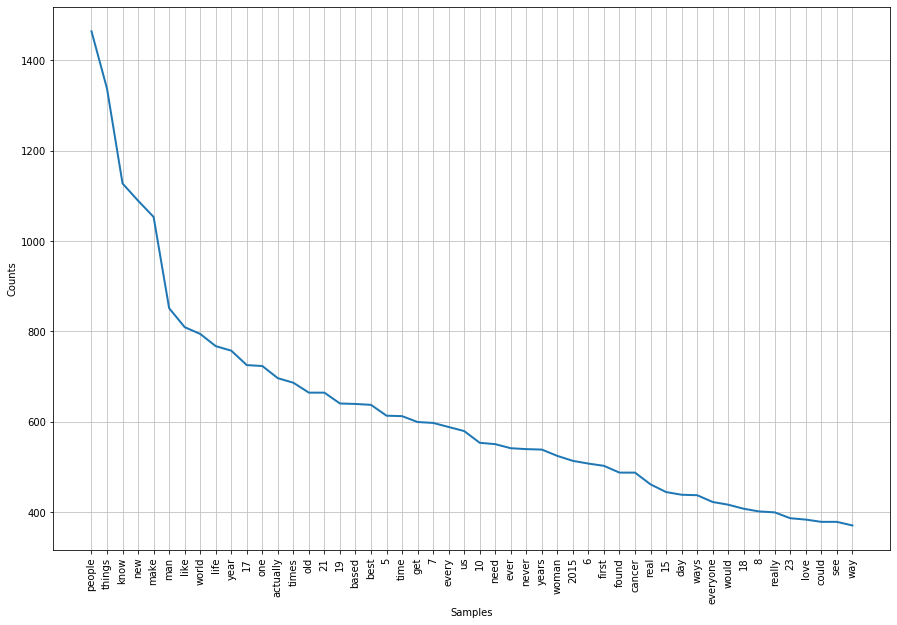

<Figure size 432x288 with 0 Axes>

In [18]:
cb_fdist = FreqDist(clean_flat_cb)

plt.figure(figsize=(15,10))
cb_fdist.plot(50)

plt.savefig('clickbait_fdist.png')

In [19]:
num_in_cb = [i for i in clean_flat_cb if i.isdigit()]
numbers = set(num_in_cb)
nonnum_in_cb = [i for i in clean_flat_cb if i not in numbers]

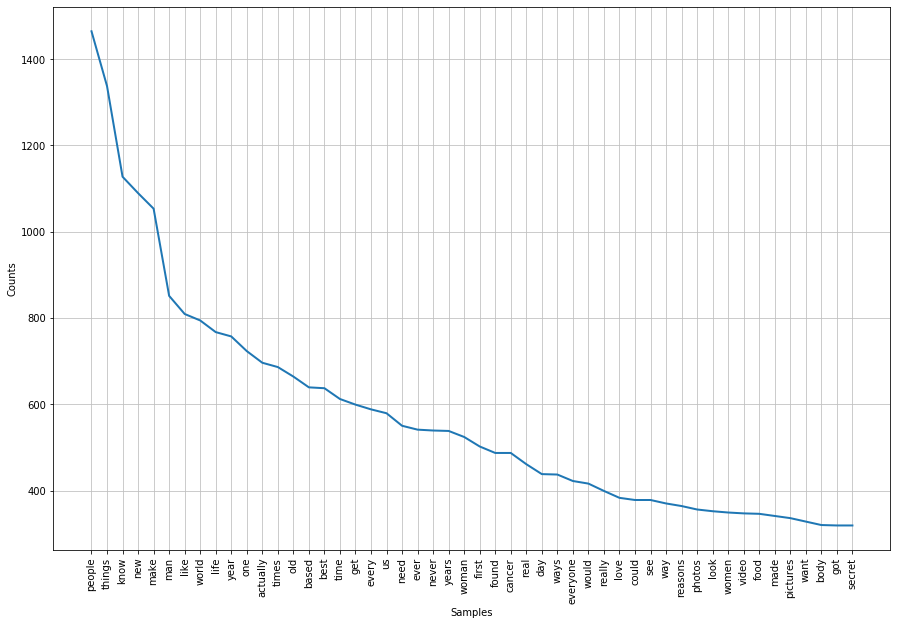

In [20]:
cb_nn_fdist = FreqDist(nonnum_in_cb)

# plot of non-numbers
plt.figure(figsize=(15,10))
cb_nn_fdist.plot(50)

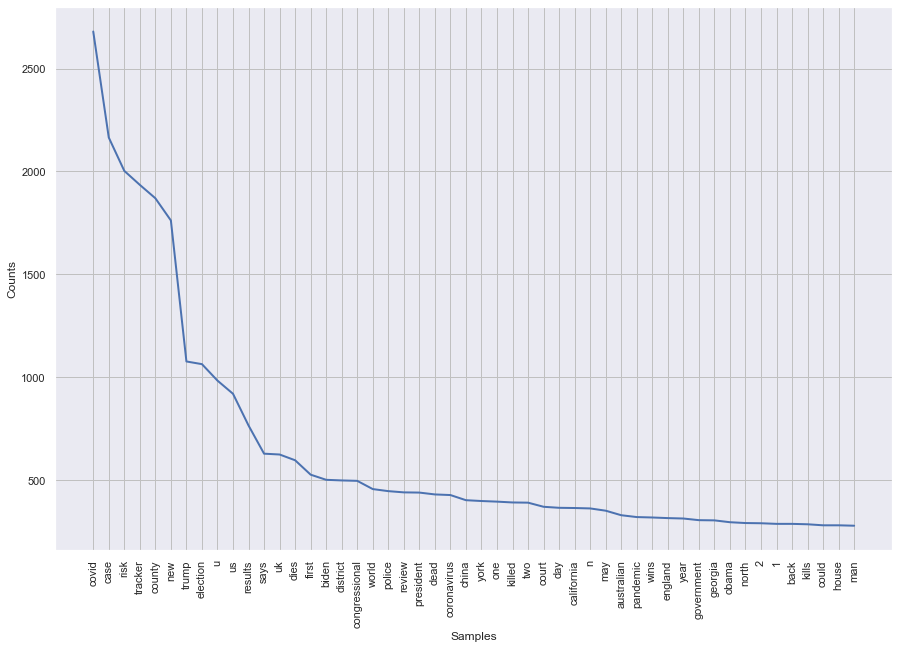

In [461]:
ncb_fdist = FreqDist(clean_flat_ncb)

# plot
plt.figure(figsize=(15,10))
ncb_fdist.plot(50)

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
lemmatized_cb_nonnum = []
for w in nonnum_in_cb:
    lemmatized_cb_nonnum.append(lemmatizer.lemmatize(w))

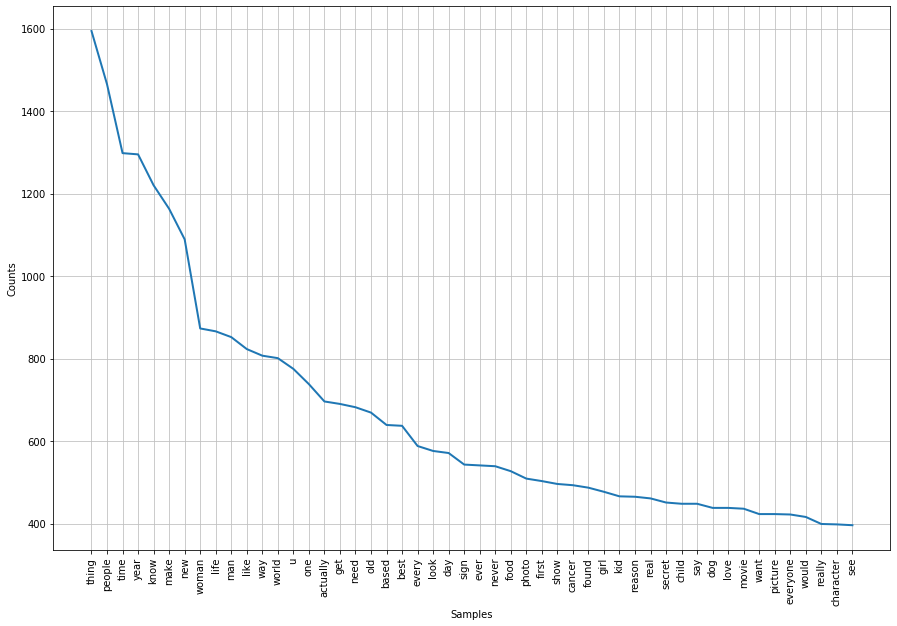

<Figure size 432x288 with 0 Axes>

In [23]:
lemmatized_cb_nonnum_fdist = FreqDist(lemmatized_cb_nonnum)

plt.figure(figsize=(15,10))
lemmatized_cb_nonnum_fdist.plot(50)

plt.savefig('clickbait_fdist.png')

In [24]:
lemmatized_ncb = []
for w in clean_flat_ncb:
    lemmatized_ncb.append(lemmatizer.lemmatize(w))

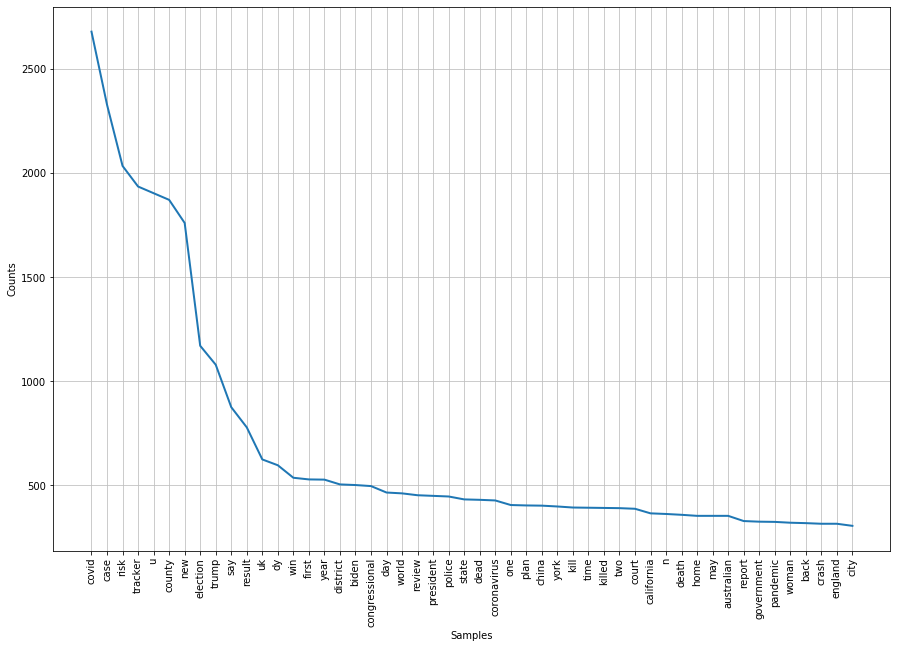

<Figure size 432x288 with 0 Axes>

In [25]:
lemmatized_ncb_fdist = FreqDist(lemmatized_ncb)

plt.figure(figsize=(15,10))
lemmatized_ncb_fdist.plot(50)

plt.savefig('nonclickbait_fdist.png')

In [ ]:
# !pip install wordcloud

In [26]:
from wordcloud import WordCloud

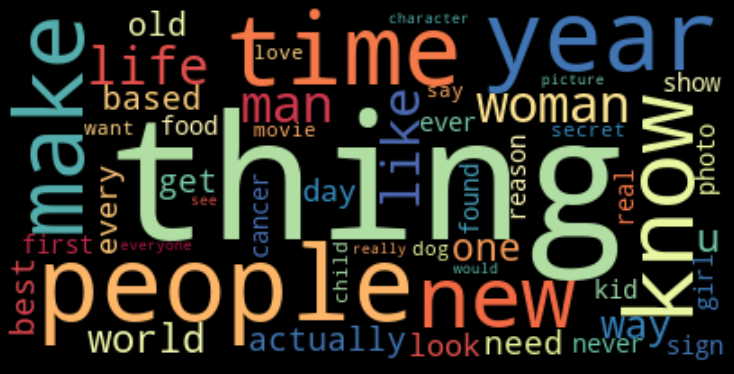

In [28]:
# Word Cloud

wordcloud = WordCloud(colormap='Spectral', max_words=50).generate_from_frequencies(lemmatized_cb_nonnum_fdist)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment to save image:
plt.savefig('clickbait_wordcloud.png')

plt.show()

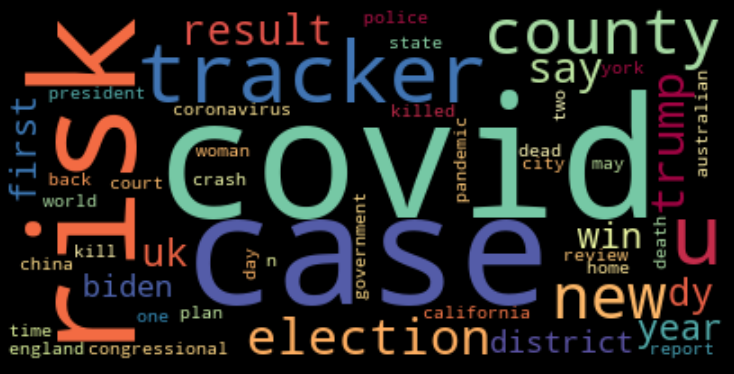

In [29]:
# Word Cloud

wordcloud = WordCloud(colormap='Spectral', max_words=50).generate_from_frequencies(lemmatized_ncb_fdist)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment to save image:
plt.savefig('nonclickbait_wordcloud.png')

plt.show()

# OSEMN Model (4) Model

asdfsafafdsfsafdsfasfda

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['clickbait'], random_state=0)

tfidf = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,2))

tfidf_text_train = tfidf.fit_transform(X_train)
tfidf_text_test = tfidf.transform(X_test)

In [395]:
tfidf_text_train

<49024x250600 sparse matrix of type '<class 'numpy.float64'>'
	with 620803 stored elements in Compressed Sparse Row format>

In [187]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
"Training Accuracy:", accuracy_score(y_train,train_preds)," Training Recall:", recall_score(y_train,train_preds), "Testing Accuracy:", accuracy_score(y_test,test_preds)," Testing Recall:", recall_score(y_test,test_preds)

In [564]:
df = pd.DataFrame([['HI', 'Temp'], ['HI', 'Precip'],
                   ['NJ', 'Temp'], ['NJ', 'Precip']],
                  columns=['a', 'b'])
pd.MultiIndex.from_frame(df)

MultiIndex([('HI',   'Temp'),
            ('HI', 'Precip'),
            ('NJ',   'Temp'),
            ('NJ', 'Precip')],
           names=['a', 'b'])

In [566]:
df['a']

0    HI
1    HI
2    NJ
3    NJ
Name: a, dtype: object

In [ ]:
names = ['Naive Bayes',
                              'Random Forest',
                              'Support Vector Machine',
                              'Logistic Regression', 
                              'K-Nearest Neighbors']


In [583]:
results = pd.DataFrame([model_results(nb_train_preds, nb_test_preds),
                        ])
pd.MultiIndex.from_frame(results)

ValueError: Must pass 2-d input

In [32]:
# function for model performance metrics
def model_results(train_preds, test_preds):
    data_matrix = [[y_train, train_preds, 'Train'], [y_test, test_preds, 'Test']]
    results = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'accuracy'])
    for data in data_matrix:
        metrics = pd.DataFrame.from_dict(classification_report(data[0], data[1], output_dict=True)['weighted avg'], orient='index', columns=[data[2]]).drop('support').T
        metrics['accuracy'] = accuracy_score(data[0], data[1])
        results = results.append(metrics)
    return results

In [568]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(tfidf_text_train, y_train)

nb_train_preds = nb_classifier.predict(tfidf_text_train)
nb_test_preds = nb_classifier.predict(tfidf_text_test)

In [569]:
model_results(nb_train_preds, nb_test_preds)

# accuracy score that penalizes more on wrong predictions

,precision,recall,f1-score,accuracy
Train,0.998939,0.998939,0.998939,0.998939
Test,0.901286,0.900318,0.900270,0.900318


In [196]:
import seaborn as sns

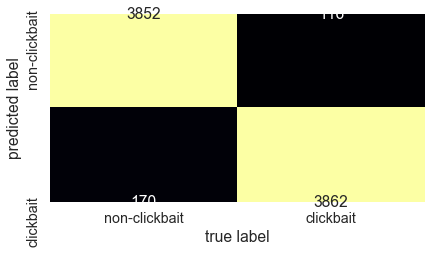

In [197]:
#confusion matrix on test set NB Classifier
sns.set()

cm_dc = confusion_matrix(y_test, nb_test_preds)
sns.set(font_scale=1.3)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig('nbcm5')
plt.show();

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
#rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators = 900 )
rf_classifier = RandomForestClassifier(class_weight = 'balanced')
rf_classifier.fit(tfidf_text_train, y_train)

rf_test_preds = rf_classifier.predict(tfidf_text_test)
rf_train_preds = rf_classifier.predict(tfidf_text_train)

In [570]:
model_results(rf_train_preds, rf_test_preds)

,precision,recall,f1-score,accuracy
Train,0.999959,0.999959,0.999959,0.999959
Test,0.863344,0.863297,0.863288,0.863297


In [ ]:
91, 94

In [200]:
from sklearn import svm
from sklearn.svm import LinearSVC

('Training Accuracy:', 0.9999796018276762, ' Training Recall:', 0.9999593016157259)
('Testing Accuracy:', 0.9020927671031698, ' Testing Recall:', 0.9259987707437001)


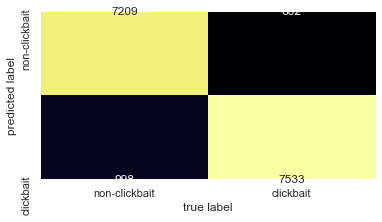

In [399]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

svm_classifier.fit(tfidf_text_train, y_train)

svm_test_preds = svm_classifier.predict(tfidf_text_test)
svm_train_preds = svm_classifier.predict(tfidf_text_train)

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [571]:
model_results(svm_train_preds, svm_test_preds)

,precision,recall,f1-score,accuracy
Train,0.99998,0.999980,0.999980,0.999980
Test,0.90306,0.902093,0.902046,0.902093


In [ ]:
95, 95

('Training Accuracy:', 0.9999796018276762, ' Training Recall:', 0.9999593016157259)
('Testing Accuracy:', 0.9018479990209277, ' Testing Recall:', 0.925138291333743)


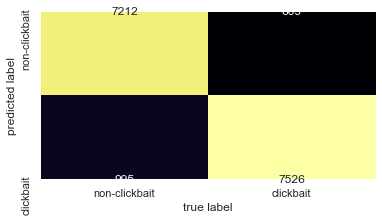

In [400]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)

lr.fit(tfidf_text_train, y_train)

lr_train_preds = lr.predict(tfidf_text_train)
lr_test_preds = lr.predict(tfidf_text_test)

#confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [577]:
model_results(lr_train_preds, lr_test_preds)

,precision,recall,f1-score,accuracy
Train,0.999980,0.999980,0.999980,0.999980
Test,0.902767,0.901848,0.901803,0.901848


In [ ]:
95,95

In [572]:
from sklearn.neighbors import KNeighborsClassifier

In [575]:
knn = KNeighborsClassifier()
knn.fit(tfidf_text_train, y_train)
knn_train_preds = knn.predict(tfidf_text_train)
knn_test_preds = knn.predict(tfidf_text_test)

In [576]:
model_results(knn_train_preds, knn_test_preds)

,precision,recall,f1-score,accuracy
Train,0.914276,0.911839,0.911718,0.911839
Test,0.849566,0.847571,0.847322,0.847571


In [ ]:
92,92

# Feature Engineering - SpaCy

In [ ]:
# numbers trained on large sets of data - has meaning embedded into the numbers
# what was SpaCy trained on - wiki or google?
# entire document or word into series of numbers

In [ ]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

In [215]:
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

In [232]:
from scipy import sparse

In [216]:
nlp = spacy.load('en_core_web_sm')

In [588]:
data

,clickbait,headline,tokenized
0,1,"5 magical cyber gems that, when printed out an...","[5, magical, cyber, gems, that, when, printed,..."
1,1,with great art comes great sacrifice: 5 times ...,"[with, great, art, comes, great, sacrifice, 5,..."
2,1,the fact that these animals have killed people...,"[the, fact, that, these, animals, have, killed..."
3,1,"come and git it, boys! 6 hunky ranch hands who...","[come, and, git, it, boys, 6, hunky, ranch, ha..."
4,1,prioritizing self-care: this woman is enjoying...,"[prioritizing, self, care, this, woman, is, en..."
...,...,...,...
65361,0,"to make female hearts flutter in iraq, throw a...","[to, make, female, hearts, flutter, in, iraq, ..."
65362,0,"british liberal democrat patsy calton, 56, die...","[british, liberal, democrat, patsy, calton, 56..."
65363,0,drone smartphone app to help heart attack vict...,"[drone, smartphone, app, to, help, heart, atta..."
65364,0,"netanyahu urges pope benedict, in israel, to d...","[netanyahu, urges, pope, benedict, in, israel,..."


In [401]:
spacy_data = data

In [402]:
spacy_data = data['headline'].progress_apply(lambda x: nlp(x))

100%|██████████| 65366/65366 [09:04<00:00, 120.01it/s]


In [403]:
spacy_df = pd.DataFrame(np.vstack([x.vector for x in spacy_data]))

# Modelling with Features

In [404]:
sp_X_train, sp_X_test = train_test_split(spacy_df, random_state=0)
sp_tfidf_text_train = sparse.hstack([tfidf_text_train, sp_X_train]).tocsr()
sp_tfidf_text_test = sparse.hstack([tfidf_text_test, sp_X_test]).tocsr()

In [235]:
spacy_nb_classifier = MultinomialNB(alpha = .05)

spacy_nb_classifier.fit(sp_tfidf_text_train, y_train)

spacy_nb_train_preds = nb_classifier.predict(sp_tfidf_text_train)
spacy_nb_test_preds = nb_classifier.predict(sp_tfidf_text_test)

print(train_results(spacy_nb_train_preds))
print(test_results(spacy_nb_test_preds))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
# Cannot use negative values for Naive Bayes, so use for SVM

In [239]:
sp_tfidf_text_train

<24000x119141 sparse matrix of type '<class 'numpy.float64'>'
	with 2578770 stored elements in Compressed Sparse Row format>

('Training Accuracy:', 1.0, ' Training Recall:', 1.0)
('Testing Accuracy:', 0.9198996450862807, ' Testing Recall:', 0.93779963122311)


/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


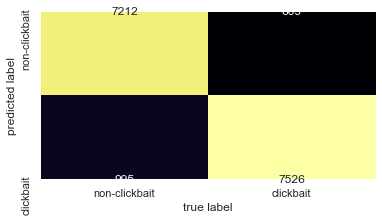

In [405]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
spacy_svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

spacy_svm_classifier.fit(sp_tfidf_text_train, y_train)

spacy_svm_test_preds = spacy_svm_classifier.predict(sp_tfidf_text_test)
spacy_svm_train_preds = spacy_svm_classifier.predict(sp_tfidf_text_train)

print(train_results(spacy_svm_train_preds))
print(test_results(spacy_svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc_sp = confusion_matrix(y_test, spacy_svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [585]:
model_results(spacy_svm_train_preds, spacy_svm_test_preds)

,precision,recall,f1-score,accuracy
Train,1.000000,1.0000,1.00000,1.0000
Test,0.920468,0.9199,0.91988,0.9199


# OSEMN Model (5) Interpret

include function to process raw text and run model - pipeline..

In [35]:
# Feature importance
forest_feat = pd.DataFrame(rf_classifier.feature_importances_)
forest_feat.index = tfidf.get_feature_names()
forest_feat.columns = ['Feature']

forest_feat.sort_values(by='Feature', ascending=False, inplace=True)

In [592]:
forest_feat

,Feature
covid,0.009162
people,0.006125
things,0.005870
know,0.005176
case,0.004931
...,...
iaea director,0.000000
cements status,0.000000
existential fight,0.000000
existed millions,0.000000


In [36]:
top_forest_feat = forest_feat.loc[forest_feat['Feature'] > 0.003]

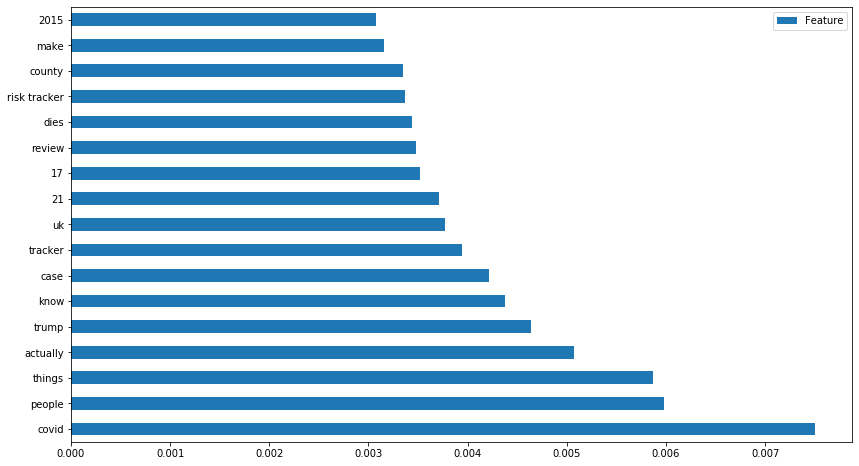

In [37]:
# top_forest_feat
ax = top_forest_feat.plot.barh(figsize=(14,8))

plt.savefig('feature_importances.png')

In [1]:
# Hyperparameter tuning with SVM

In [2]:
# Which kernel? which encoding duirng EDA?